NON FUNZIONA!!!!!!

CLASSIFICAZIONE MULTICLASSE

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv

--2022-04-19 15:43:21--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.245.179
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.245.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15359 (15K) [text/csv]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]  15.00K  --.-KB/s    in 0s      

2022-04-19 15:43:21 (229 MB/s) - ‘penguins.csv.1’ saved [15359/15359]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,auc, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('penguins.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


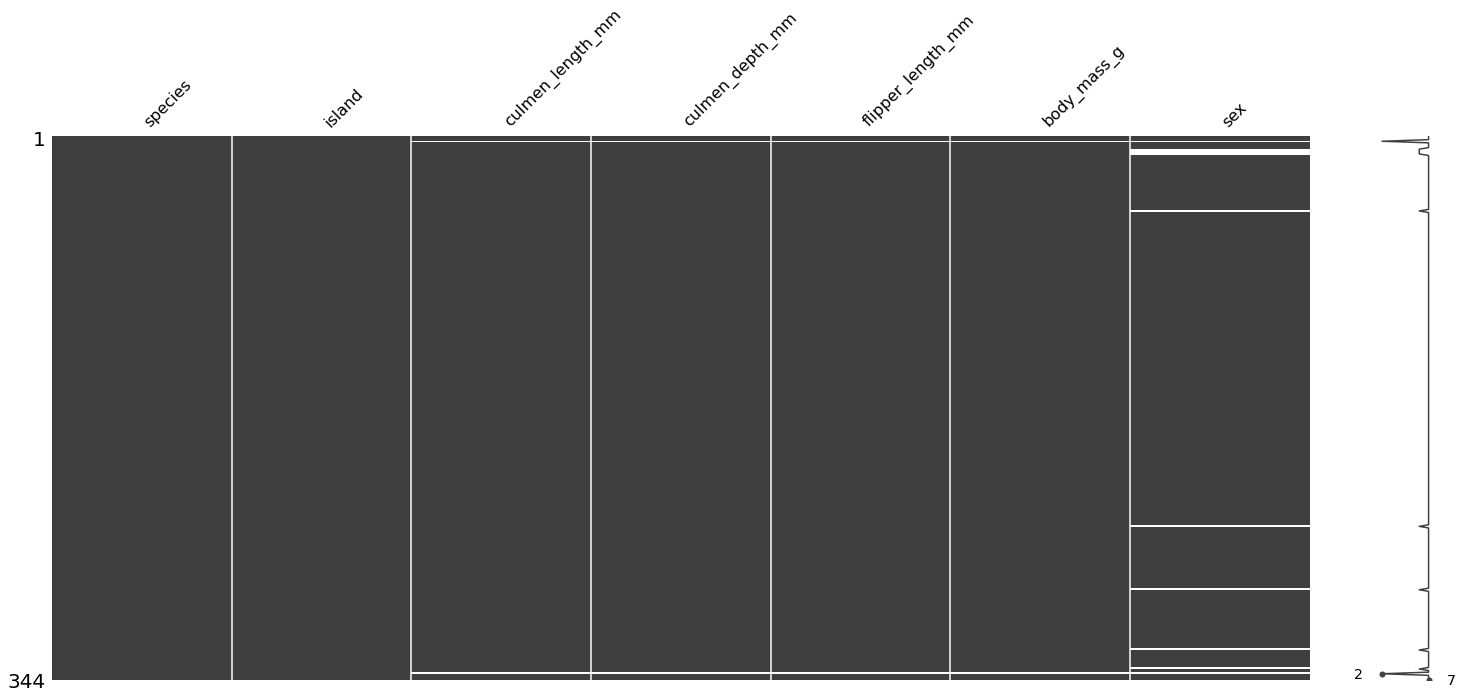

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
# checking for missing values
#df.isnull().sum().sum()
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(333, 7)

In [10]:
# riempimento valori nulli con la media
#df.fillna.mean()

In [11]:
#riempimento valori nulli con la moda
 #df = df.fillna(df.mode().iloc[0]) 

In [12]:
# To replace missing values with interpolated values, for example Age
#df['culmen_length_mm'] = df['culmen_length_mm'].interpolate()

In [13]:
# statistiche delle features
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
# verifico bilanciamento Target
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

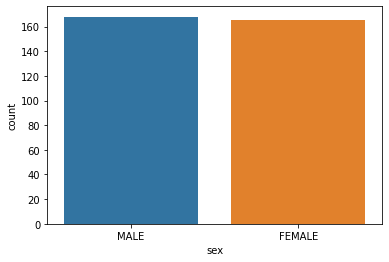

In [15]:
sns.countplot(x='sex',data=df);

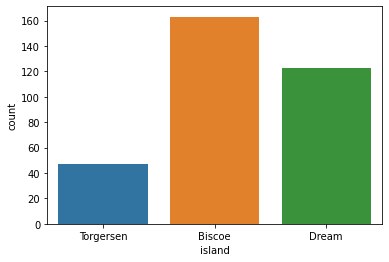

In [16]:
sns.countplot(x='island',data=df);

In [17]:
# codifico il target label encoding
df['species'].replace({'Adelie':0,'Gentoo':1,'Chinstrap':2},inplace=True)

In [18]:
df.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
0,38.823973,18.347260,190.102740,3706.164384
1,47.568067,14.996639,217.235294,5092.436975
2,48.833824,18.420588,195.823529,3733.088235


#EDA

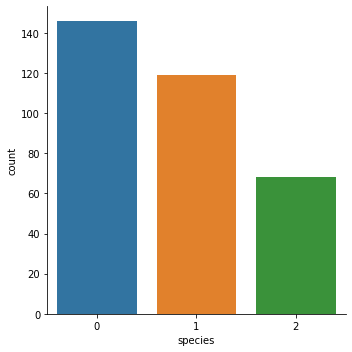

In [19]:
# number of values for each quality
sns.catplot(x='species', data = df, kind = 'count')

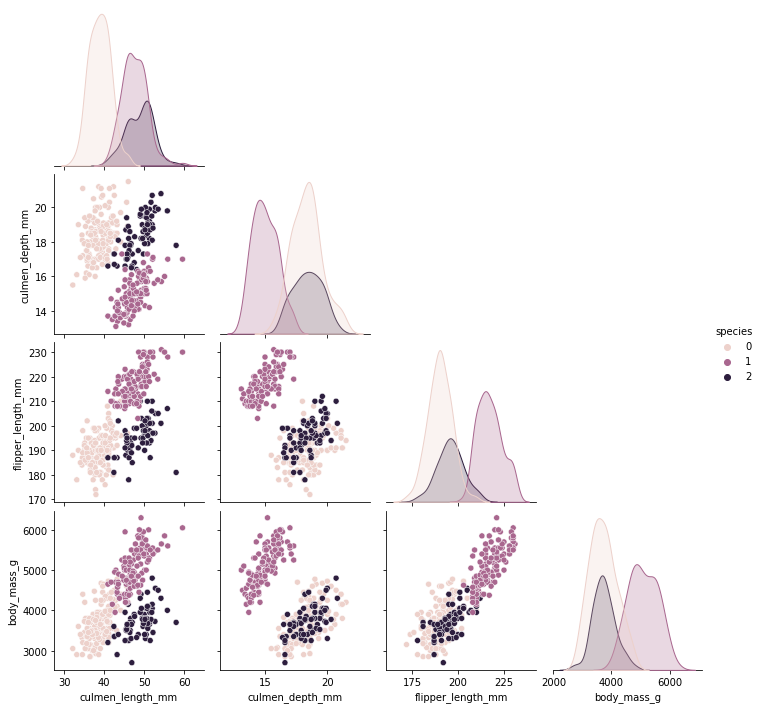

In [20]:
sns.pairplot(df,hue='species', corner=True);

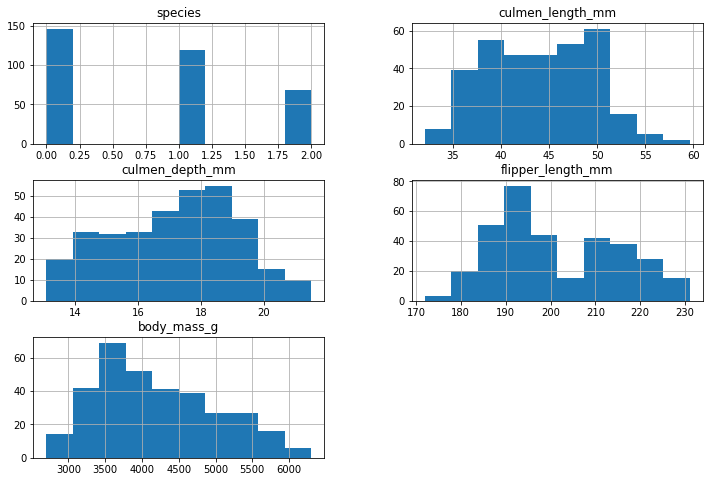

In [21]:
df.hist(figsize=(12,8));

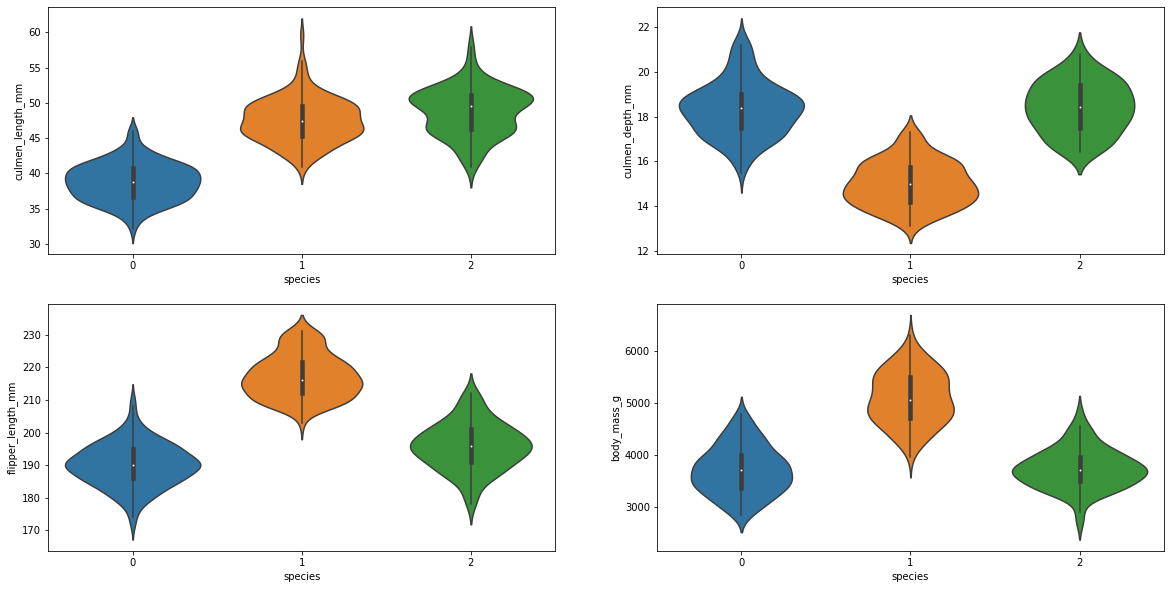

In [22]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='species', y='culmen_length_mm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='culmen_depth_mm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='flipper_length_mm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='body_mass_g', data=df);

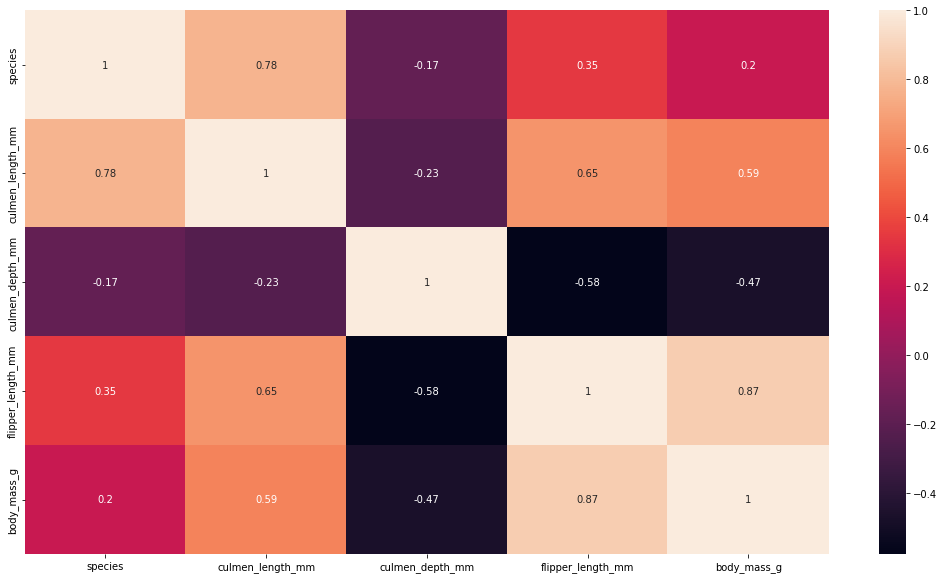

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True);

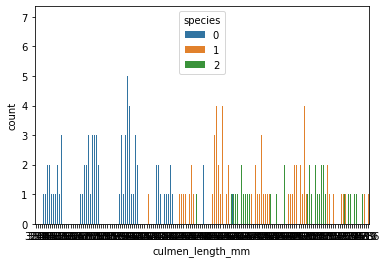

In [24]:
sns.countplot(x='culmen_length_mm',hue='species',data=df)

In [25]:
# controllo types features
df.dtypes

species                int64
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [26]:
cat_feat = [col for col in df.columns if df[col].dtype == object]
cat_feat

['island', 'sex']

In [27]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [28]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [29]:
# converto categorical features SE binarie con replace
df.replace({'sex':{'MALE':0,'FEMALE':1}},inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,0
1,0,Torgersen,39.5,17.4,186.0,3800.0,1
2,0,Torgersen,40.3,18.0,195.0,3250.0,1
4,0,Torgersen,36.7,19.3,193.0,3450.0,1
5,0,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,1,Biscoe,47.2,13.7,214.0,4925.0,1
340,1,Biscoe,46.8,14.3,215.0,4850.0,1
341,1,Biscoe,50.4,15.7,222.0,5750.0,0
342,1,Biscoe,45.2,14.8,212.0,5200.0,1


In [30]:
#df.replace({'island':{'Torgersen':0,'Dream':1,'Biscoe':2}},inplace=True)

In [32]:
#converto categorical features non binarie con dummies

dummies = pd.get_dummies(df['island'], drop_first=True)
dummies

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
338,0,0
340,0,0
341,0,0
342,0,0


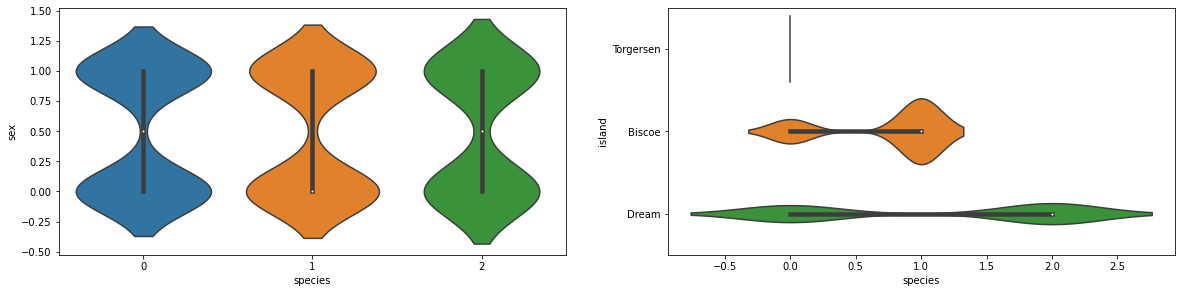

In [33]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='species', y='sex', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='island', data=df)

#Splitting the Features and Target

In [ ]:
#df = df[['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex','species']]

In [34]:
X = df.drop(columns=['species','island'], axis=1)
X = X.join(dummies)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
4,36.7,19.3,193.0,3450.0,1,0,1
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,0
342,45.2,14.8,212.0,5200.0,1,0,0


In [ ]:
# dichiaro X e y
#X = df.drop(columns='species', axis=1)

In [35]:
y = df['species']
print(y)

0      0
1      0
2      0
4      0
5      0
      ..
338    1
340    1
341    1
342    1
343    1
Name: species, Length: 333, dtype: int64


In [36]:
#standardscaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X) #occhio se stai usando X_

X_ = standardized_data
X_

array([[-0.89604189,  0.7807321 , -1.42675157, ..., -0.99103121,
        -0.76531973,  2.46680084],
       [-0.82278787,  0.11958397, -1.06947358, ...,  1.00904996,
        -0.76531973,  2.46680084],
       [-0.67627982,  0.42472926, -0.42637319, ...,  1.00904996,
        -0.76531973,  2.46680084],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796, ..., -0.99103121,
        -0.76531973, -0.40538335],
       [ 0.22108196, -1.20271231,  0.78837197, ...,  1.00904996,
        -0.76531973, -0.40538335],
       [ 1.08181673, -0.54156417,  0.85982757, ..., -0.99103121,
        -0.76531973, -0.40538335]])

#Splitting the Data into Training data & Test Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(333, 7) (266, 7) (67, 7)


#Classification

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [40]:
model_collection = []

model_collection.append(LogisticRegression(solver='liblinear'))
model_collection.append(RandomForestClassifier())
model_collection.append(SVC())
model_collection.append(KNeighborsClassifier())
model_collection.append(DecisionTreeClassifier())
model_collection.append(GaussianNB())

In [41]:
model_list = ['Logistic_Regression','Random_Forest','SVM','KNN','DecionTree','Naive_Bayes']
acc_list = []
f1_list = []
cm_list = []

for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred,average='macro'))
    cm_list.append(confusion_matrix(y_test,y_pred))

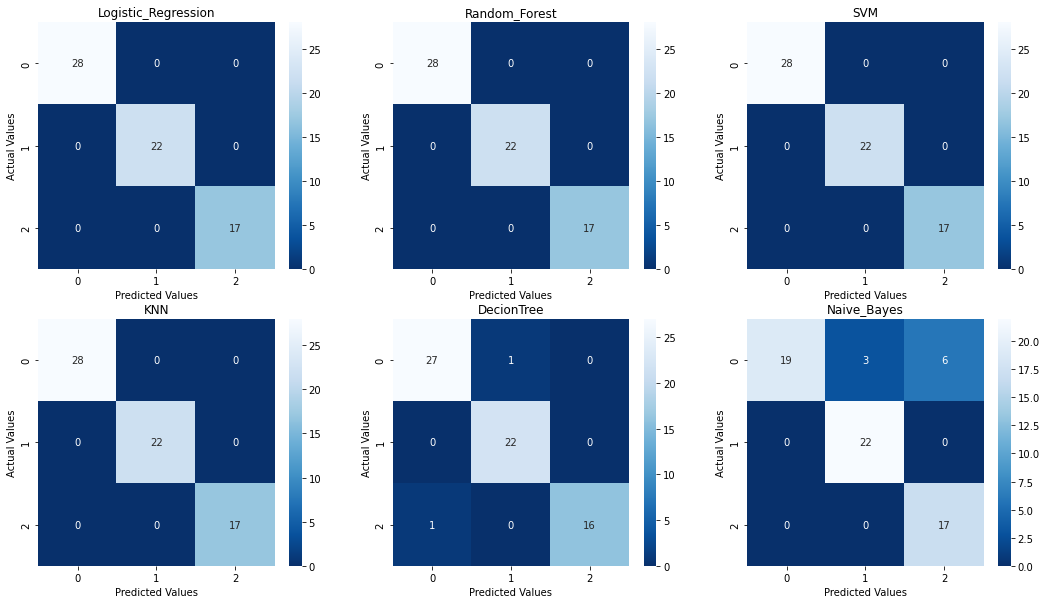

In [42]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [43]:
for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,model.predict(X_test)))

LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        17

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        17

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        22
     

In [44]:
result_df = pd.DataFrame({
                            'Model':model_list,
                            'Accuracy':acc_list,
                            'F1':f1_list
                          })
result_df.sort_values(by=['F1'],ascending=False)

,Model,Accuracy,F1
0,Logistic_Regression,1.000000,1.000000
1,Random_Forest,1.000000,1.000000
2,SVM,1.000000,1.000000
3,KNN,1.000000,1.000000
4,DecionTree,0.970149,0.970587
5,Naive_Bayes,0.865672,0.864894


In [45]:
bestmodel = LogisticRegression().fit(X_train,y_train)

In [46]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,1
4,36.7,19.3,193.0,3450.0,1,0,1
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,0
342,45.2,14.8,212.0,5200.0,1,0,0


#BUILD A PREDICTIVE SYSTEM

In [47]:
input_data = [39.1, 18.7, 181.0, 3750.0, 0, 0, 1]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = bestmodel.predict(std_data)
print(prediction[0])

if prediction[0]== 0:
    print('Adelie')
elif prediction[0]== 1:
    print('Gentoo')
else:
    print('Chinstrap')

[[-0.89604189  0.7807321  -1.42675157 -0.56847478 -0.99103121 -0.76531973
   2.46680084]]
0
Adelie


#Pipeline

Always give not normalize data to train the Pipeline!

In [48]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [49]:
# X = raw features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [50]:
standardize = StandardScaler()
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
#classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)
classifier = LogisticRegression()

pipe = Pipeline([
                ('scaler', standardize),
                #('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [51]:
input_data = [39.1, 18.7, 181.0, 3750.0, 0, 0, 1]

prediction = pipe.predict([input_data])
print(prediction[0])

if prediction[0]== 0:
  print('Adelie')
elif prediction[0]== 1:
  print('Gentoo')
else:
  print('Chinstrap')

0
Adelie


In [52]:
import joblib
joblib.dump(pipe,'pipe_penguins.pkl')

['pipe_penguins.pkl']

In [53]:
uploaded_model = joblib.load('pipe_penguins.pkl')

uploaded_model.predict([input_data])[0] 

0